In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

%matplotlib inline

In [3]:
df = pd.read_csv("day_wise.csv",sep=r'\s*,\s*')
df.head(5)

C:\Users\Rajesh\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [6]:
df.tail(5)

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
146,2020-06-16,8173199,443669,3892350,3837180,139479,6786,97395,5.43,47.62,11.4,187
147,2020-06-17,8349209,448943,4009755,3890511,176010,5274,117405,5.38,48.03,11.2,187
148,2020-06-18,8488235,453963,4090382,3943890,139026,5020,80627,5.35,48.19,11.1,187
149,2020-06-19,8664012,460001,4180522,4023489,175925,6038,90140,5.31,48.25,11.0,187
150,2020-06-20,8791053,464449,4300164,4026440,127041,4448,119642,5.28,48.92,10.8,187


In [7]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
count,1.510000e+02,151.000000,1.510000e+02,1.510000e+02,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,2.438784e+06,150384.331126,9.324020e+05,1.355998e+06,58374.569536,3075.708609,28477.721854,4.943179,30.133444,25.073841,133.841060
std,2.687919e+06,160091.373786,1.205002e+06,1.358507e+06,48263.232481,2603.523091,31730.467566,1.739212,14.805876,23.881579,68.898969
min,5.550000e+02,17.000000,2.800000e+01,5.100000e+02,0.000000,0.000000,0.000000,2.040000,1.740000,6.090000,6.000000
25%,8.431350e+04,2900.500000,3.823050e+04,5.169700e+04,3347.500000,113.500000,1983.000000,3.420000,21.035000,12.185000,58.000000
50%,1.321862e+06,78848.000000,2.723710e+05,9.706430e+05,73933.000000,3508.000000,18869.000000,5.430000,31.120000,18.920000,183.000000
75%,4.401428e+06,300160.000000,1.527858e+06,2.573410e+06,93882.500000,5237.500000,49984.000000,6.570000,41.985000,27.100000,187.000000
max,8.791053e+06,464449.000000,4.300164e+06,4.026440e+06,176010.000000,8864.000000,150922.000000,7.180000,55.610000,134.430000,187.000000


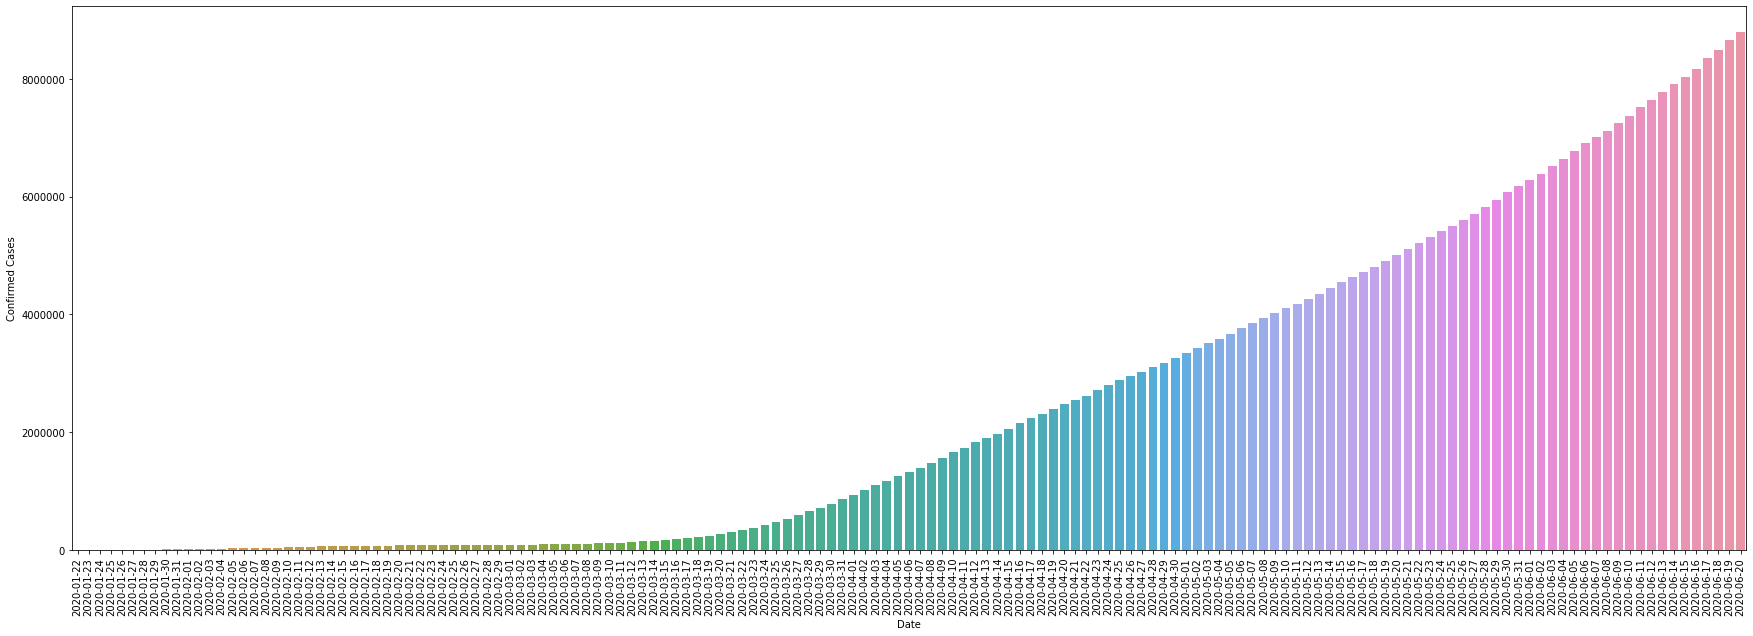

In [8]:
#Ques1:- Plot the rise in no. of Covid-19 cases
plt.figure(figsize=(30,10))
fig = sns.barplot(x = df['Date'], y = df['Confirmed'], data = df)
plt.xlabel('Date')
plt.xticks(rotation = 90)
plt.ylabel('Confirmed Cases')
plt.show()

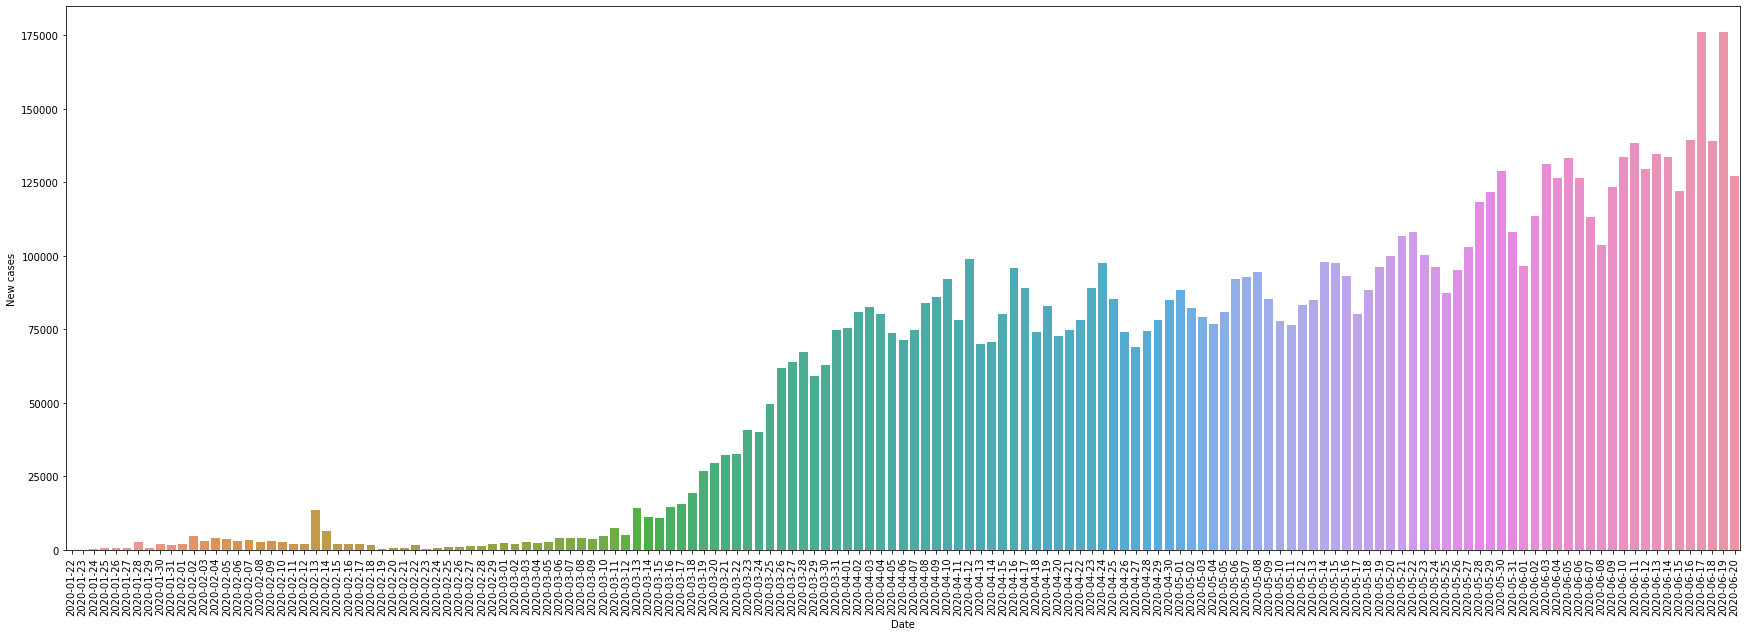

In [9]:
#Ques2:- Let us anaylse the trend in the no. of cases being added everyday using a bar plot
plt.figure(figsize=(30,10))
fig = sns.barplot(x = df['Date'], y = df['New cases'], data = df)
plt.xlabel('Date')
plt.xticks(rotation = 90)
plt.ylabel('New cases')
plt.show()

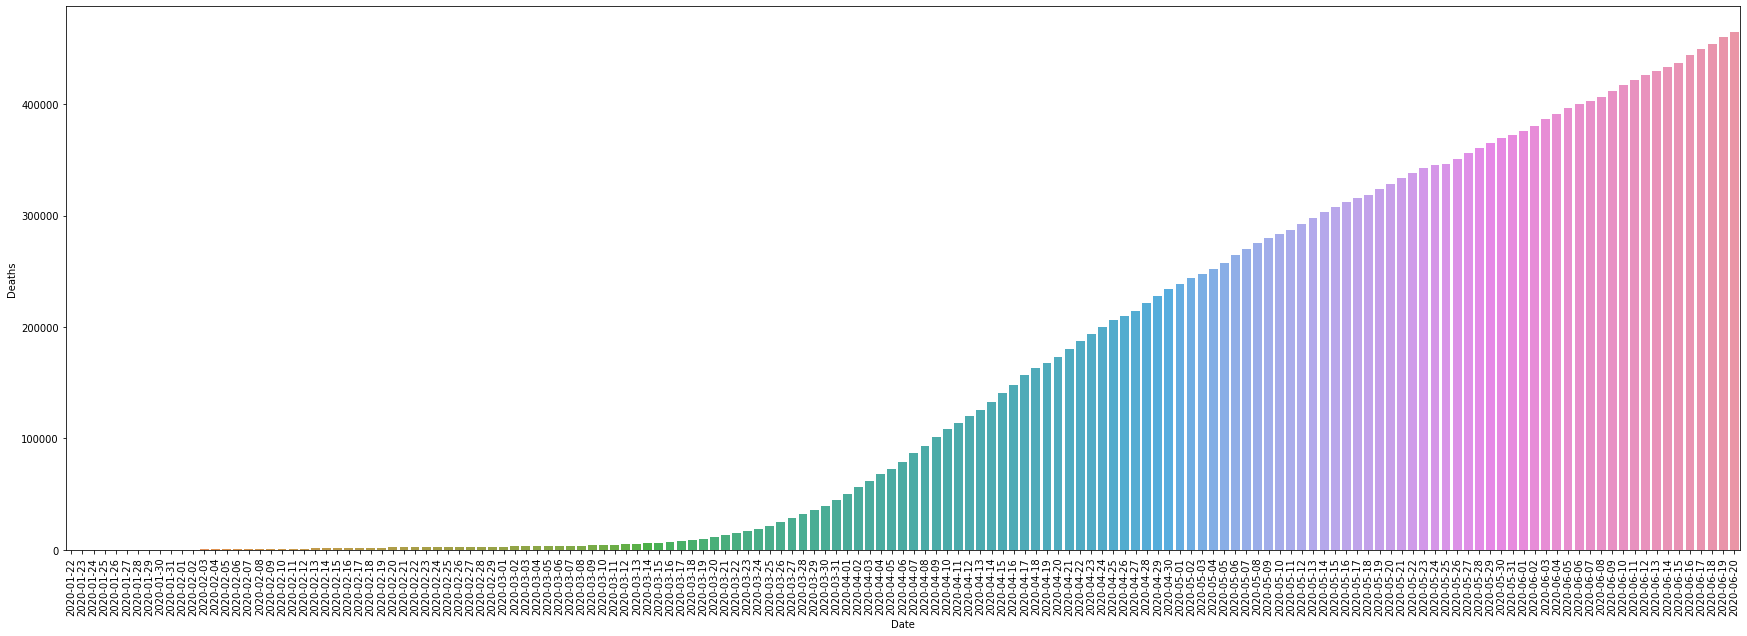

In [10]:
#Ques3:- Plot the rise in no. of Covid-19 deaths
plt.figure(figsize=(30,10))
fig = sns.barplot(x = df['Date'], y = df['Deaths'], data = df)
plt.xlabel('Date')
plt.xticks(rotation = 90)
plt.ylabel('Deaths')
plt.show()

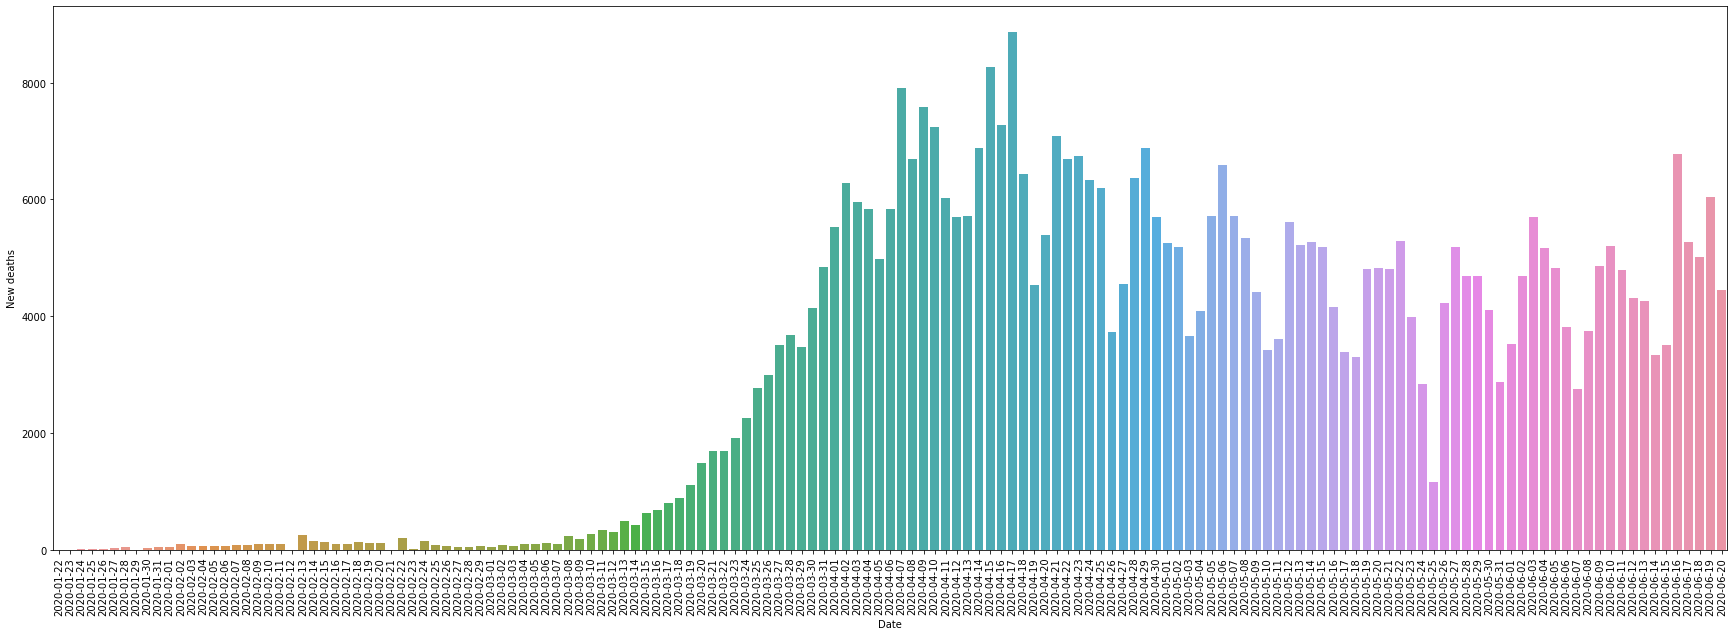

In [11]:
#Ques4:- Let us anaylse the trend in the no. of new deaths being added everyday using a bar plot
plt.figure(figsize=(30,10))
fig = sns.barplot(x = df['Date'], y = df['New deaths'], data = df)
plt.xlabel('Date')
plt.xticks(rotation = 90)
plt.ylabel('New deaths')
plt.show()

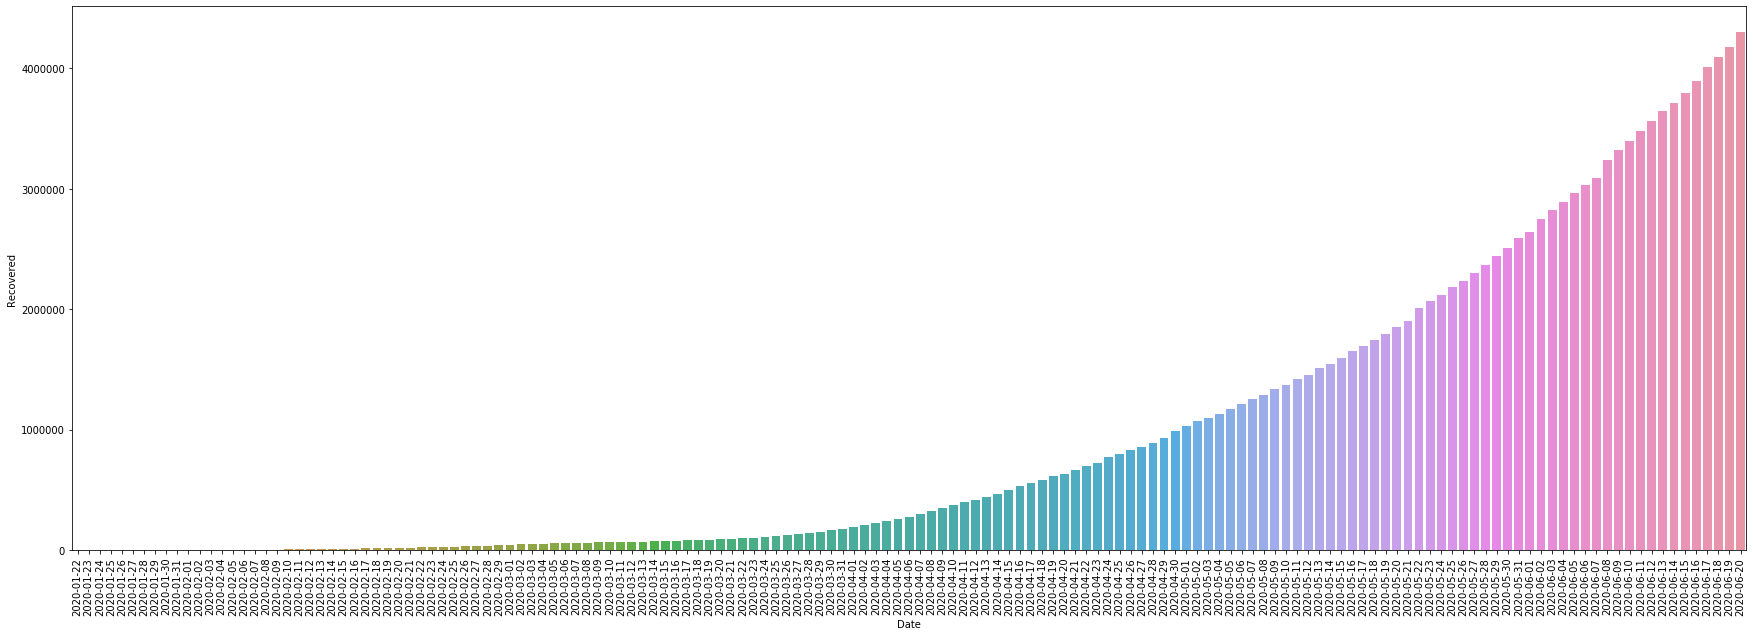

In [12]:
#Ques3:- Plot the rise in no. of Covid-19 deaths
plt.figure(figsize=(30,10))
fig = sns.barplot(x = df['Date'], y = df['Recovered'], data = df)
plt.xlabel('Date')
plt.xticks(rotation = 90)
plt.ylabel('Recovered')
plt.show()

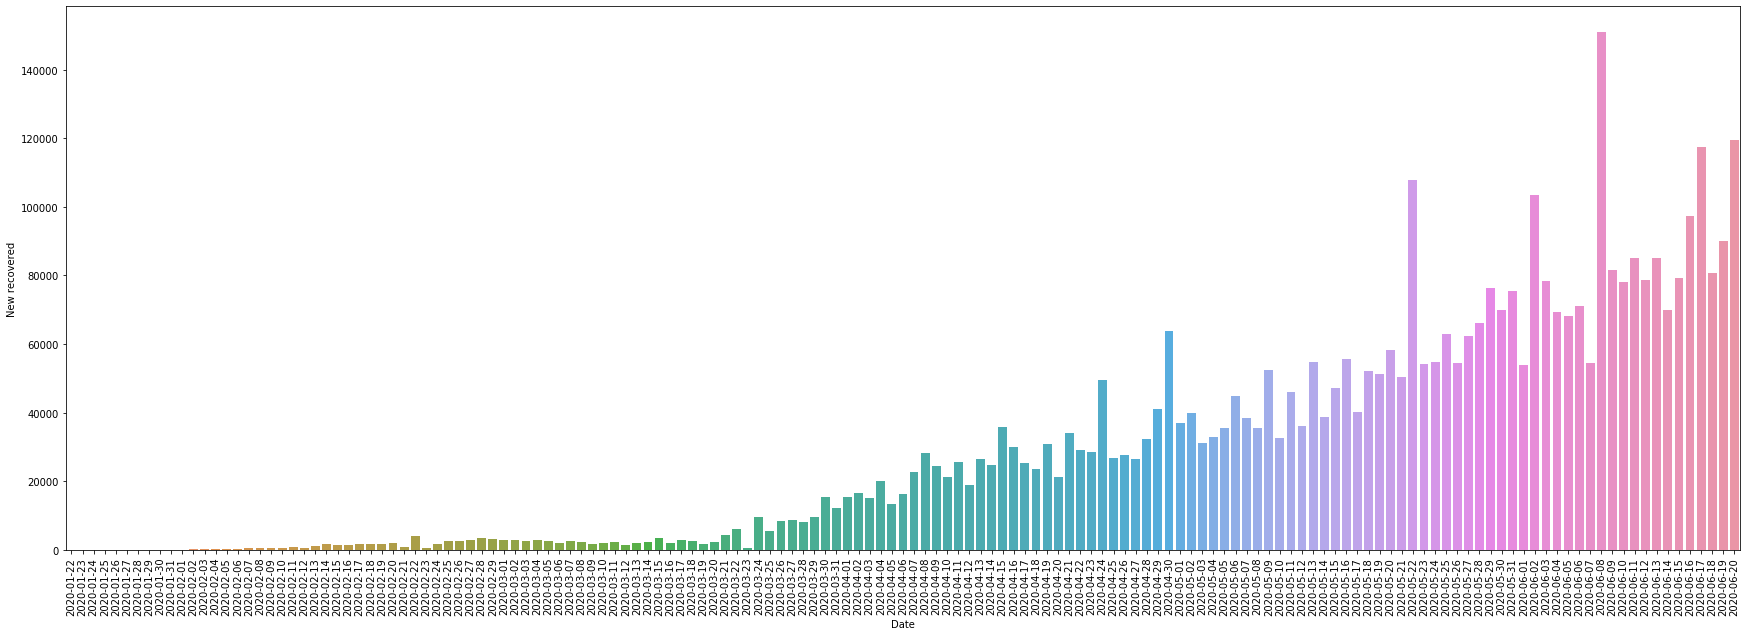

In [13]:
#Ques6:- Let us anaylse the trend in the no. of new recoveries being added everyday using a bar plot
plt.figure(figsize=(30,10))
fig = sns.barplot(x = df['Date'], y = df['New recovered'], data = df)
plt.xlabel('Date')
plt.xticks(rotation = 90)
plt.ylabel('New recovered')
plt.show()

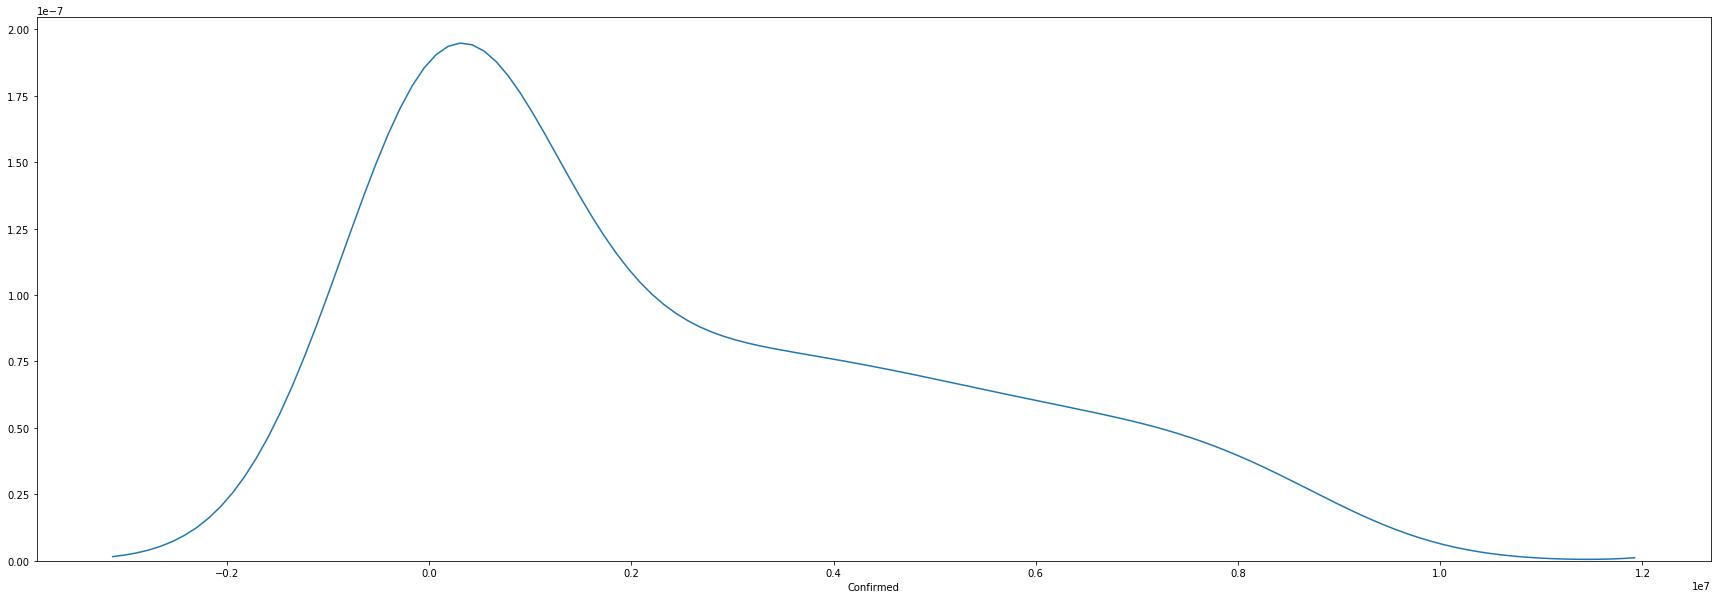

In [14]:
#Question - 7 Let us plot the ditribution plot of confirmed Covid-19 cases 
plt.figure(figsize=(30,10))
fig = sns.distplot(df['Confirmed'],hist = False)
plt.show()

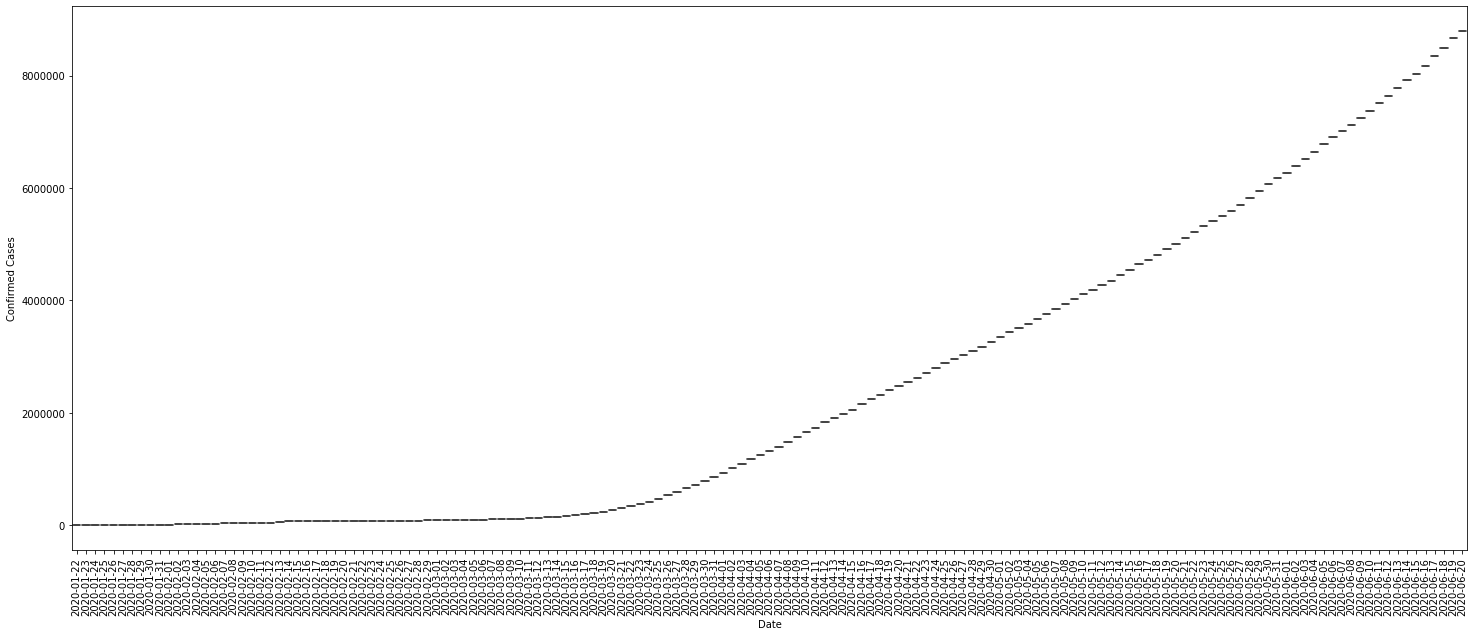

In [15]:
plt.figure(figsize=(25,10))
sns.boxplot(x = df['Date'], y = df['Confirmed'],data = df)
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation = 90)
plt.show()

In [16]:
#Ques:- 5 Days which recorded the most cases
df1 = df['New cases'].sort_values(ascending = False)
x = np.array(df1[:5])
y = np.array(df['Date'])
z = np.array(df['New cases'])
date = []
t = 0
for i in range(0,x.shape[0]):
    for j in range(0,z.shape[0]):
        if z[j] == x[i]:
            date.append(y[j])
date

['2020-06-17', '2020-06-19', '2020-06-16', '2020-06-18', '2020-06-11']

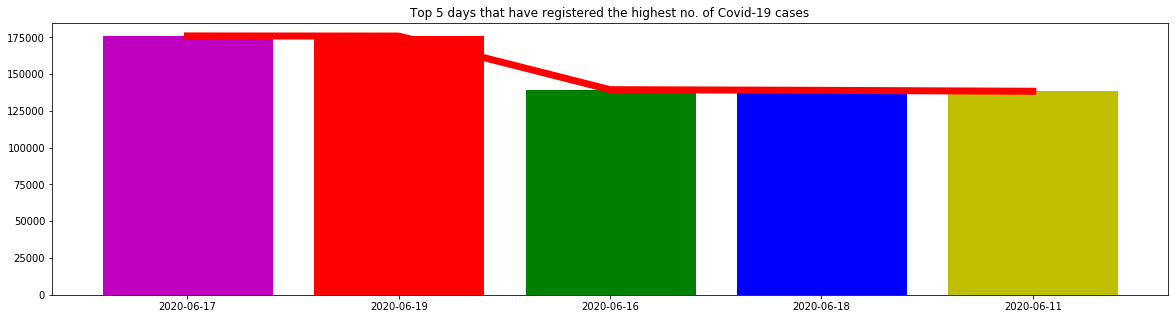

In [17]:
plt.figure(figsize=(20,5))
barlist = plt.bar(date,x)
barlist[0].set_color('m')
barlist[1].set_color('r')
barlist[2].set_color('g')
barlist[3].set_color('b')
barlist[4].set_color('y')
plt.plot(date, x, c='red',linewidth=7.0)
plt.title('Top 5 days that have registered the highest no. of Covid-19 cases')
plt.show()

In [18]:
#Ques:- 5 Days which recorded the most cases
df1 = df['New cases'].sort_values(ascending = True)
x = np.array(df1[:5])
y = np.array(df['Date'])
z = np.array(df['New cases'])
date = []
t = 0
for i in range(0,x.shape[0]):
    for j in range(0,z.shape[0]):
        if z[j] == x[i]:
            date.append(y[j])
date

['2020-01-22', '2020-01-23', '2020-01-24', '2020-02-23', '2020-02-19']

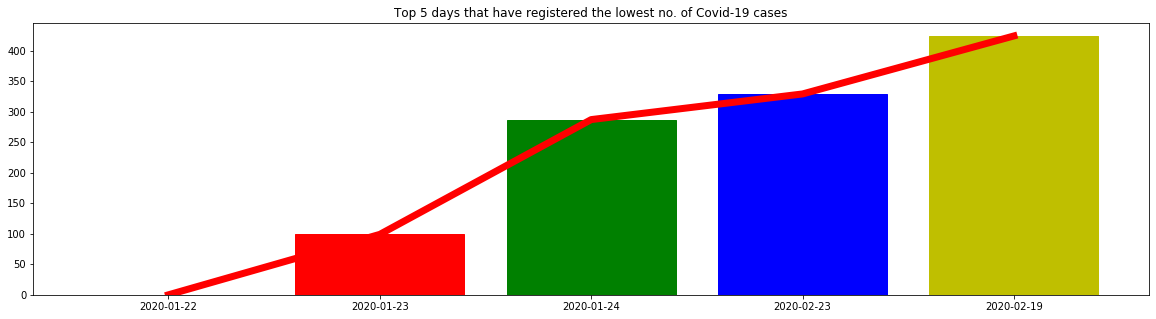

In [19]:
plt.figure(figsize=(20,5))
barlist = plt.bar(date,x)
barlist[0].set_color('m')
barlist[1].set_color('r')
barlist[2].set_color('g')
barlist[3].set_color('b')
barlist[4].set_color('y')
plt.plot(date, x, c='red',linewidth=7.0)
plt.title('Top 5 days that have registered the lowest no. of Covid-19 cases')
plt.show()

In [20]:
#Ques:- 5 Days which recorded the most deaths
df1 = df['New deaths'].sort_values(ascending = False)
x = np.array(df1[:5])
y = np.array(df['Date'])
z = np.array(df['New deaths'])
date = []
for i in range(0,x.shape[0]):
    for j in range(0,z.shape[0]):
        if z[j] == x[i]:
            date.append(y[j])
date

['2020-04-17', '2020-04-15', '2020-04-07', '2020-04-09', '2020-04-16']

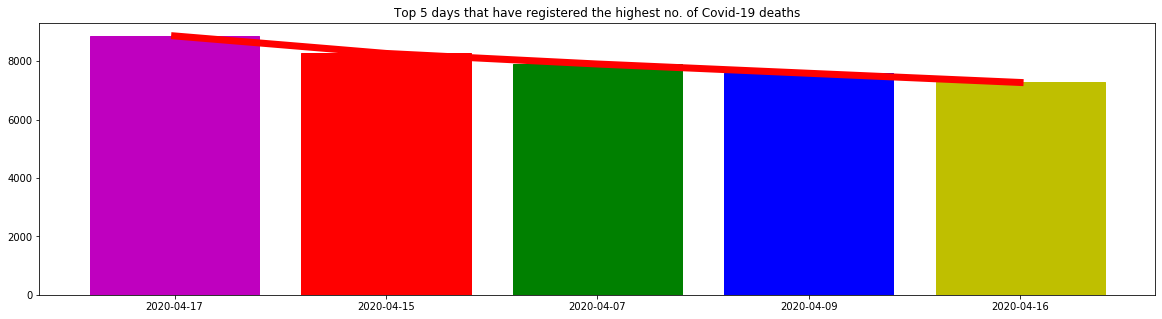

In [21]:
plt.figure(figsize=(20,5))
barlist = plt.bar(date,x)
barlist[0].set_color('m')
barlist[1].set_color('r')
barlist[2].set_color('g')
barlist[3].set_color('b')
barlist[4].set_color('y')
plt.plot(date, x, c='red',linewidth=7.0)
plt.title('Top 5 days that have registered the highest no. of Covid-19 deaths')
plt.show()

In [22]:
#Ques:- 5 Days which recorded the most deaths
df1 = df['New deaths'].sort_values(ascending = True)
x = np.array(df1[:5])
y = np.array(df['Date'])
z = np.array(df['New deaths'])
date = []
for i in range(0,x.shape[0]):
    for j in range(0,z.shape[0]):
        if z[j] == x[i]:
            date.append(y[j])
date

['2020-01-22', '2020-01-23', '2020-01-29', '2020-02-21', '2020-02-12']

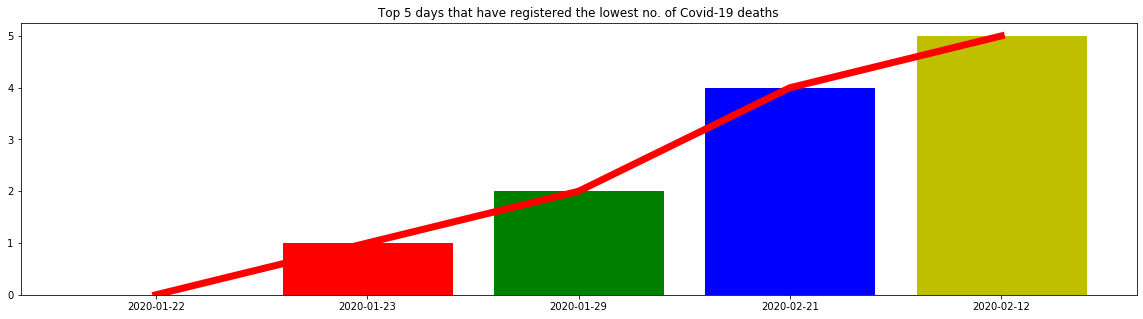

In [23]:
plt.figure(figsize=(20,5))
barlist = plt.bar(date,x)
barlist[0].set_color('m')
barlist[1].set_color('r')
barlist[2].set_color('g')
barlist[3].set_color('b')
barlist[4].set_color('y')
plt.plot(date, x, c='red',linewidth=7.0)
plt.title('Top 5 days that have registered the lowest no. of Covid-19 deaths')
plt.show()

In [24]:
#Ques:- 5 Days which recorded the most deaths
df1 = df['New recovered'].sort_values(ascending = False)
x = np.array(df1[:5])
y = np.array(df['Date'])
z = np.array(df['New recovered'])
date = []
for i in range(0,x.shape[0]):
    for j in range(0,z.shape[0]):
        if z[j] == x[i]:
            date.append(y[j])
date

['2020-06-08', '2020-06-20', '2020-06-17', '2020-05-22', '2020-06-02']

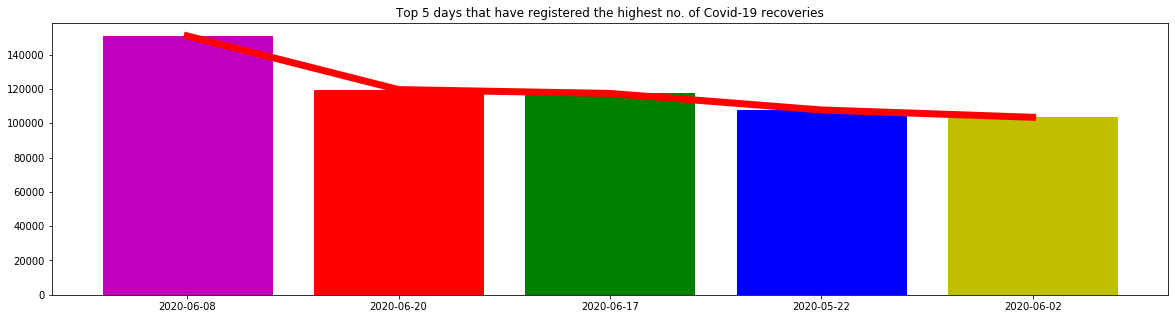

In [25]:
plt.figure(figsize=(20,5))
barlist = plt.bar(date,x)
barlist[0].set_color('m')
barlist[1].set_color('r')
barlist[2].set_color('g')
barlist[3].set_color('b')
barlist[4].set_color('y')
plt.plot(date, x, c='red',linewidth=7.0)
plt.title('Top 5 days that have registered the highest no. of Covid-19 recoveries')
plt.show()

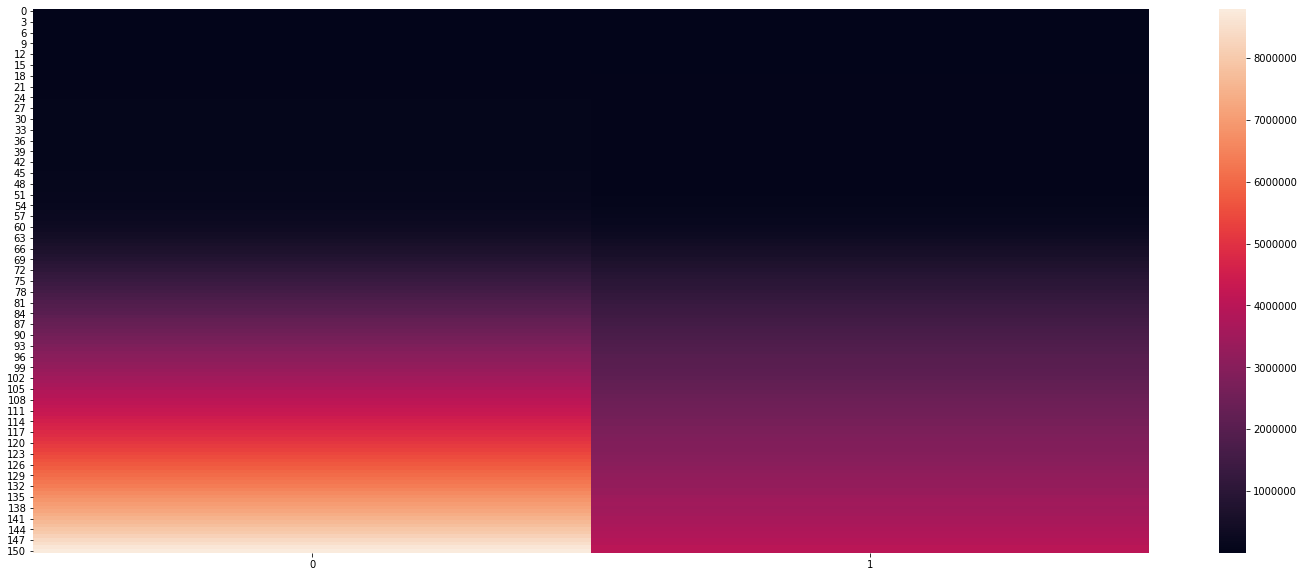

In [26]:
plt.figure(figsize=(25,10))
fig = sns.heatmap(df.iloc[:,[1,4]].values)
plt.show(fig)

<Figure size 1440x720 with 0 Axes>

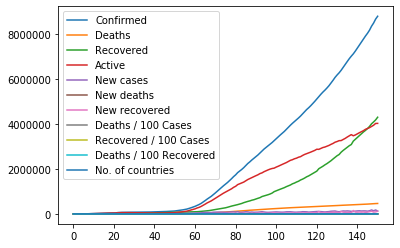

In [27]:
plt.figure(figsize=(20,10))
df.plot()
plt.show()

<Figure size 2160x720 with 0 Axes>

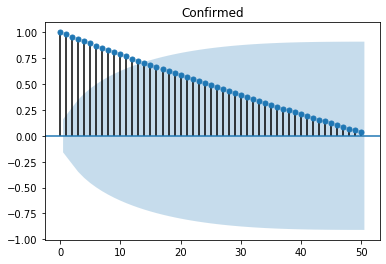

<Figure size 2160x720 with 0 Axes>

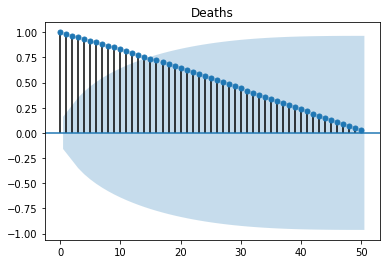

<Figure size 2160x720 with 0 Axes>

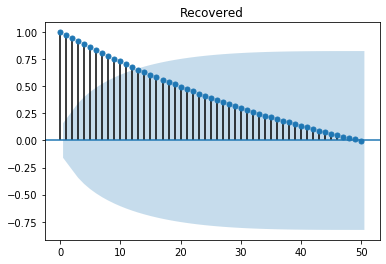

<Figure size 2160x720 with 0 Axes>

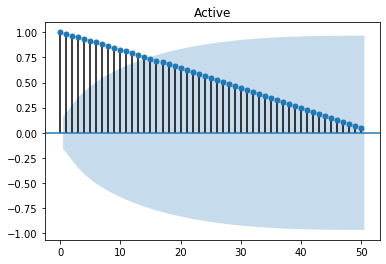

<Figure size 2160x720 with 0 Axes>

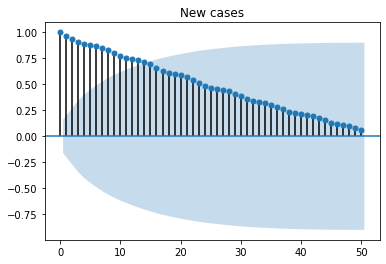

<Figure size 2160x720 with 0 Axes>

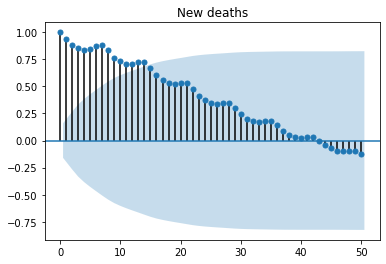

<Figure size 2160x720 with 0 Axes>

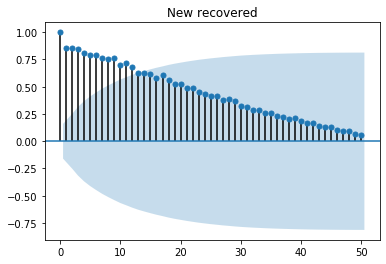

<Figure size 2160x720 with 0 Axes>

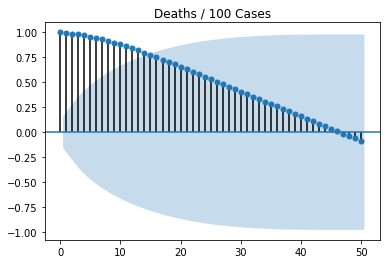

<Figure size 2160x720 with 0 Axes>

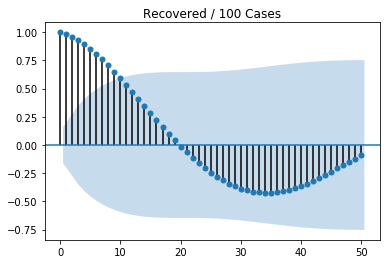

<Figure size 2160x720 with 0 Axes>

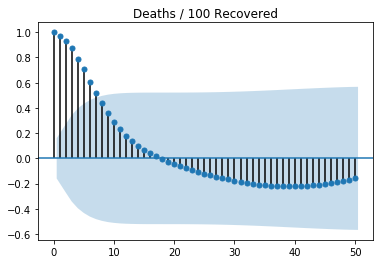

<Figure size 2160x720 with 0 Axes>

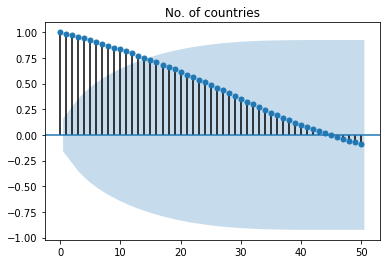

In [28]:
lis = list(df.columns)
for i in range(1,12):
    y = df.iloc[:,i].values
    y = y.astype('float')
    plt.figure(figsize=(30,10))
    plot_acf(y,lags = 50)
    plt.title(lis[i])
    plt.show()

<Figure size 2160x720 with 0 Axes>

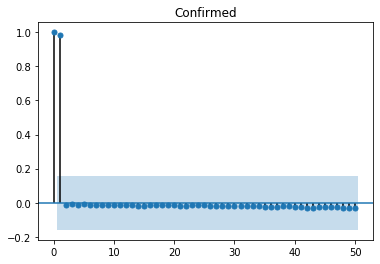

<Figure size 2160x720 with 0 Axes>

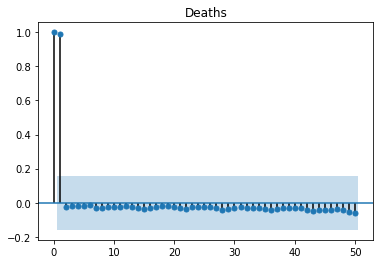

<Figure size 2160x720 with 0 Axes>

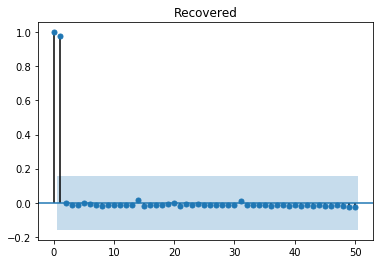

<Figure size 2160x720 with 0 Axes>

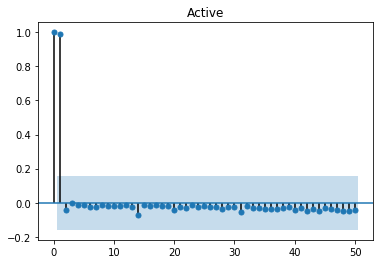

<Figure size 2160x720 with 0 Axes>

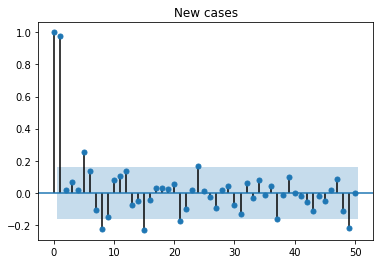

<Figure size 2160x720 with 0 Axes>

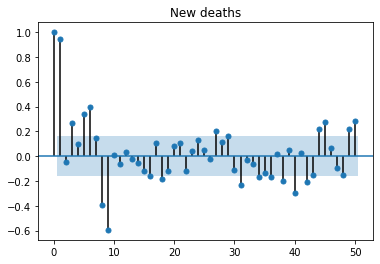

<Figure size 2160x720 with 0 Axes>

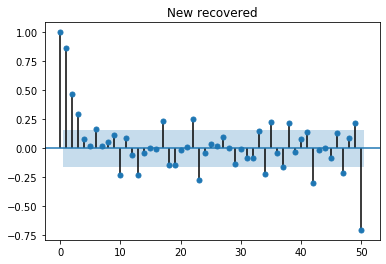

C:\Users\Rajesh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


<Figure size 2160x720 with 0 Axes>

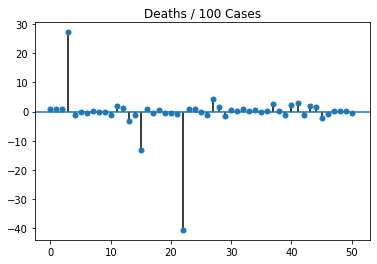

<Figure size 2160x720 with 0 Axes>

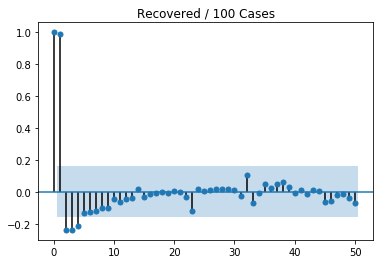

C:\Users\Rajesh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


<Figure size 2160x720 with 0 Axes>

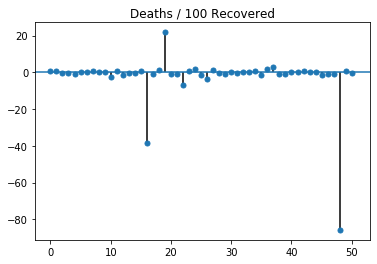

<Figure size 2160x720 with 0 Axes>

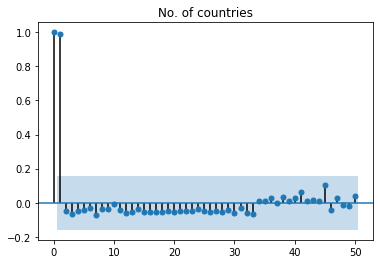

In [29]:
lis = list(df.columns)
for i in range(1,12):
    y = df.iloc[:,i].values
    y = y.astype('float')
    plt.figure(figsize=(30,10))
    plot_pacf(y,lags = 50)
    plt.title(lis[i])
    plt.show()

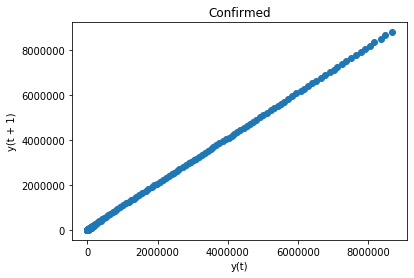

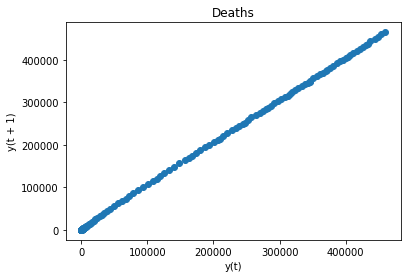

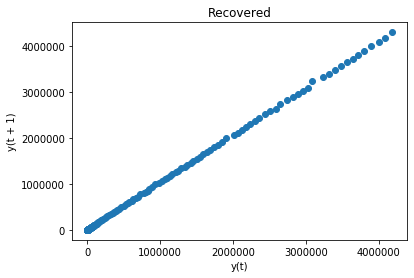

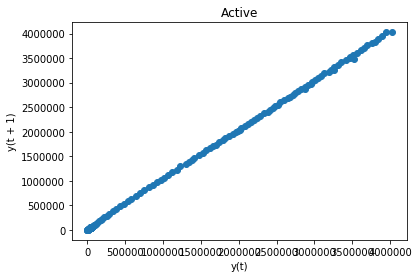

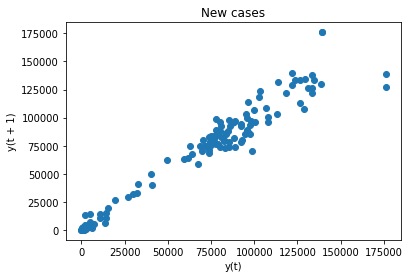

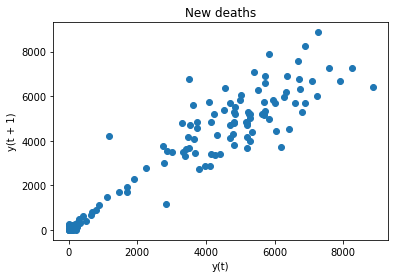

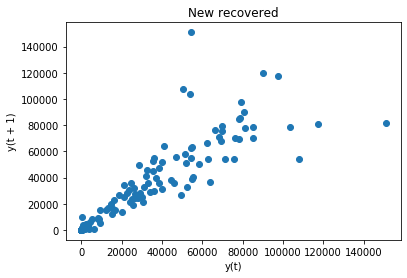

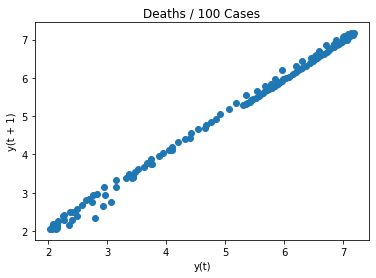

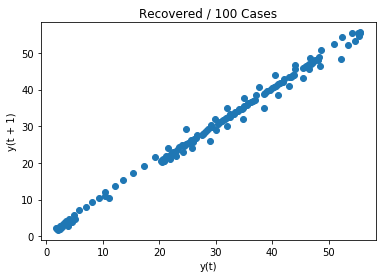

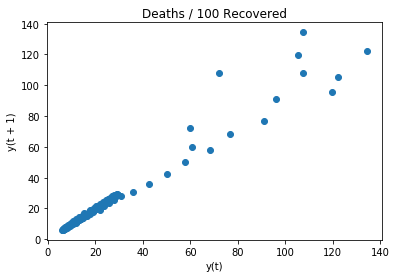

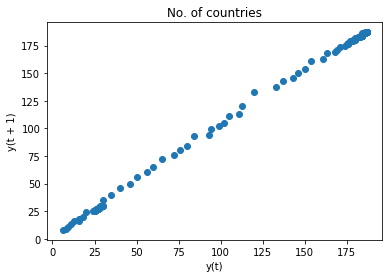

In [30]:
from pandas.plotting import lag_plot
lis = list(df.columns)
for i in range(1,12):
    lag_plot(df.iloc[:,i])
    plt.title(lis[i])
    plt.show()

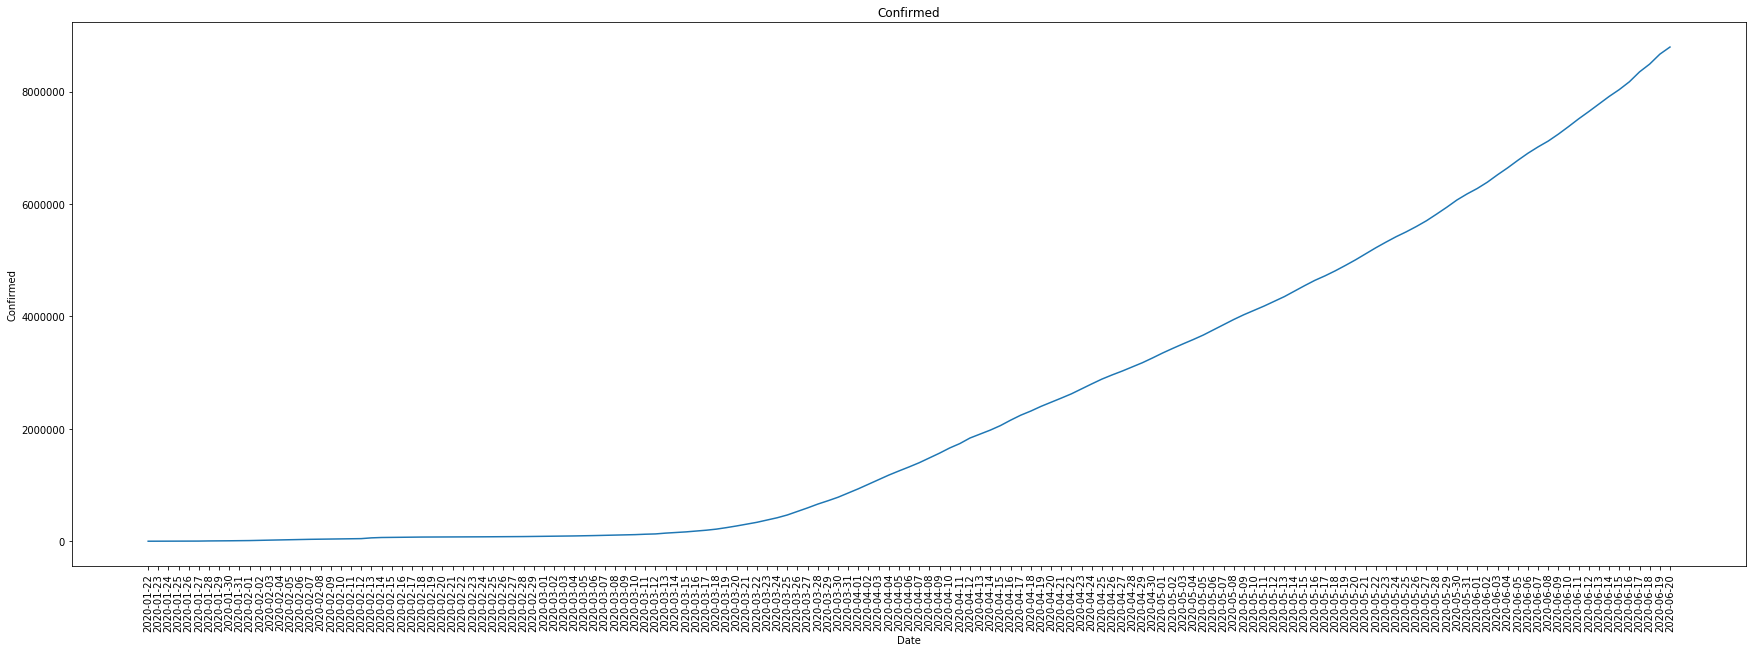

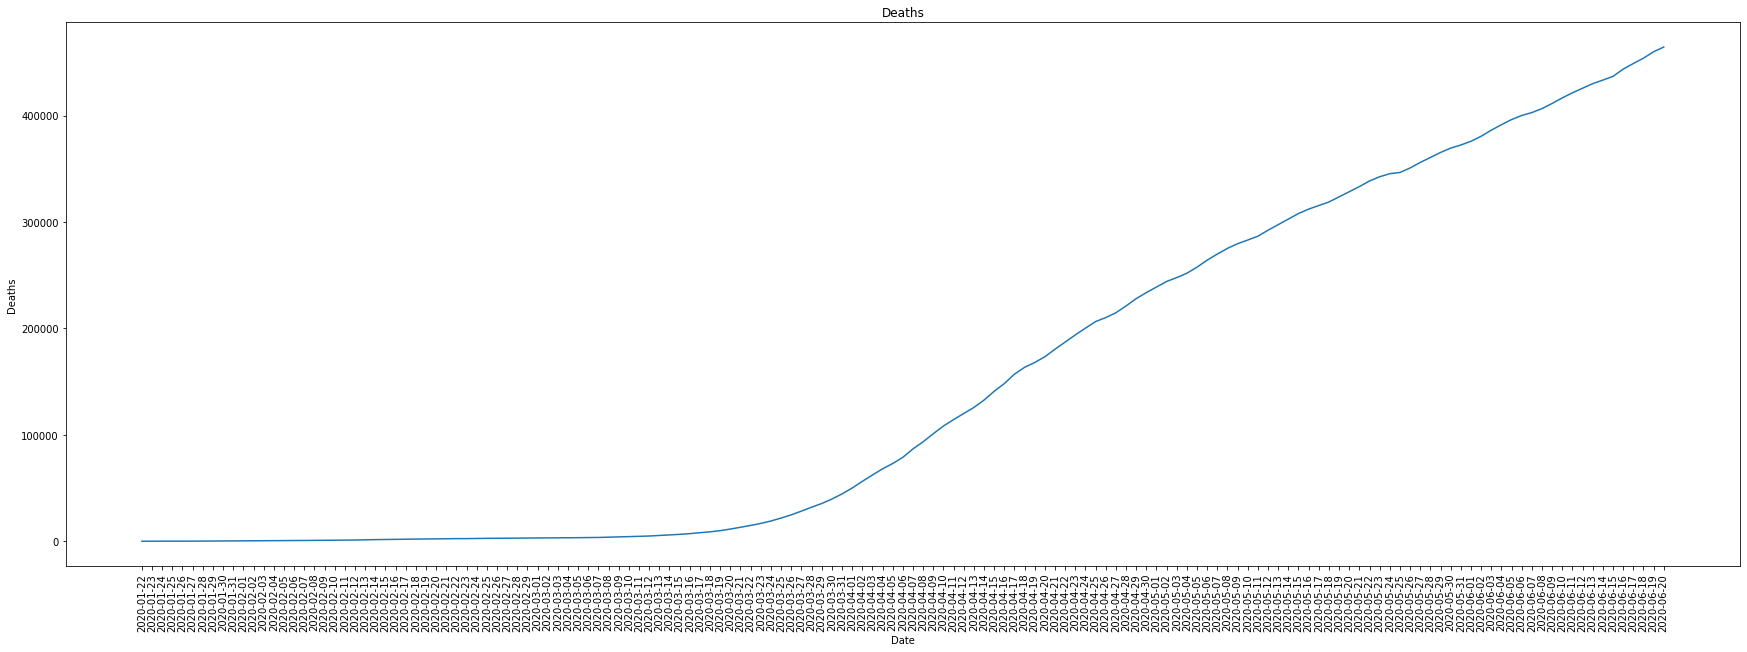

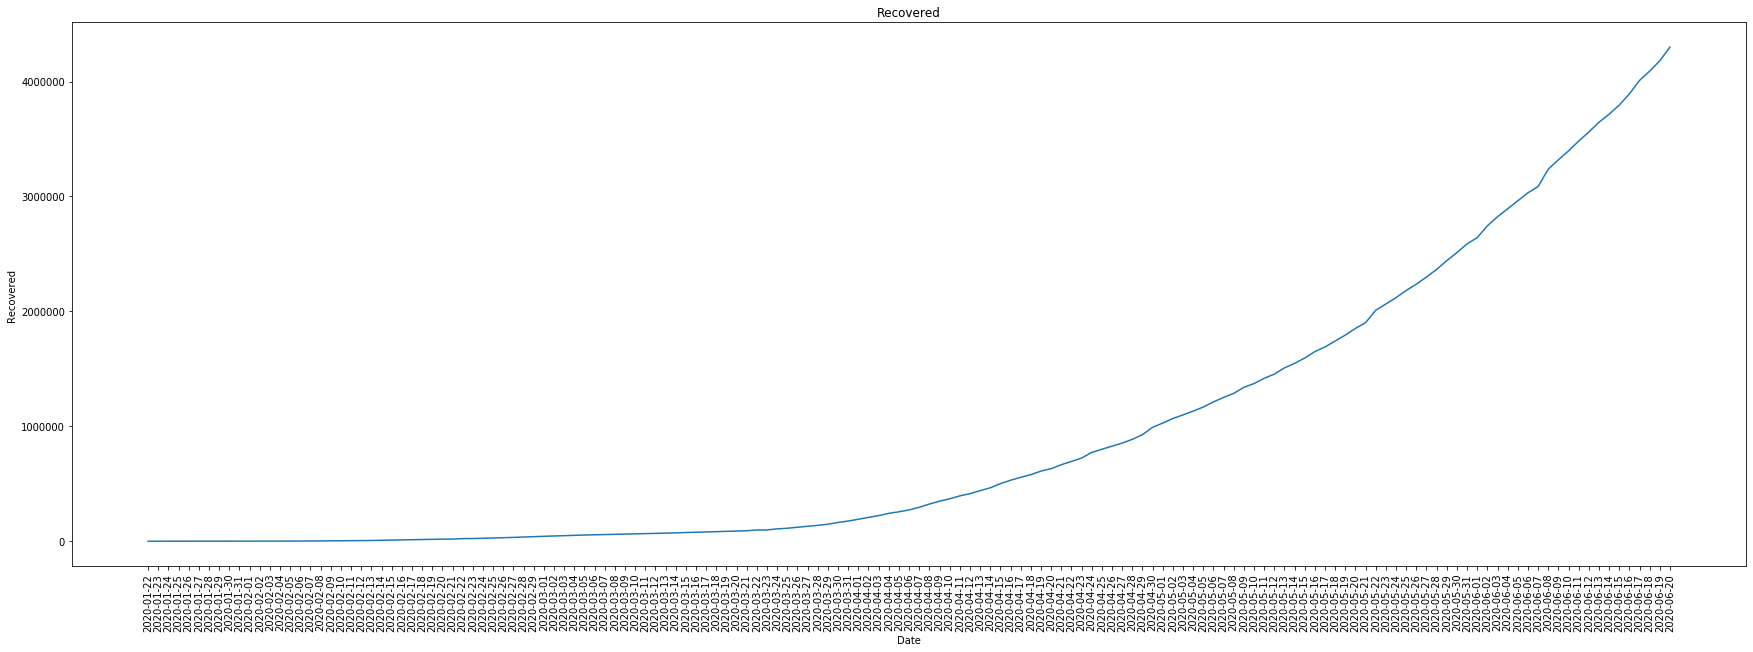

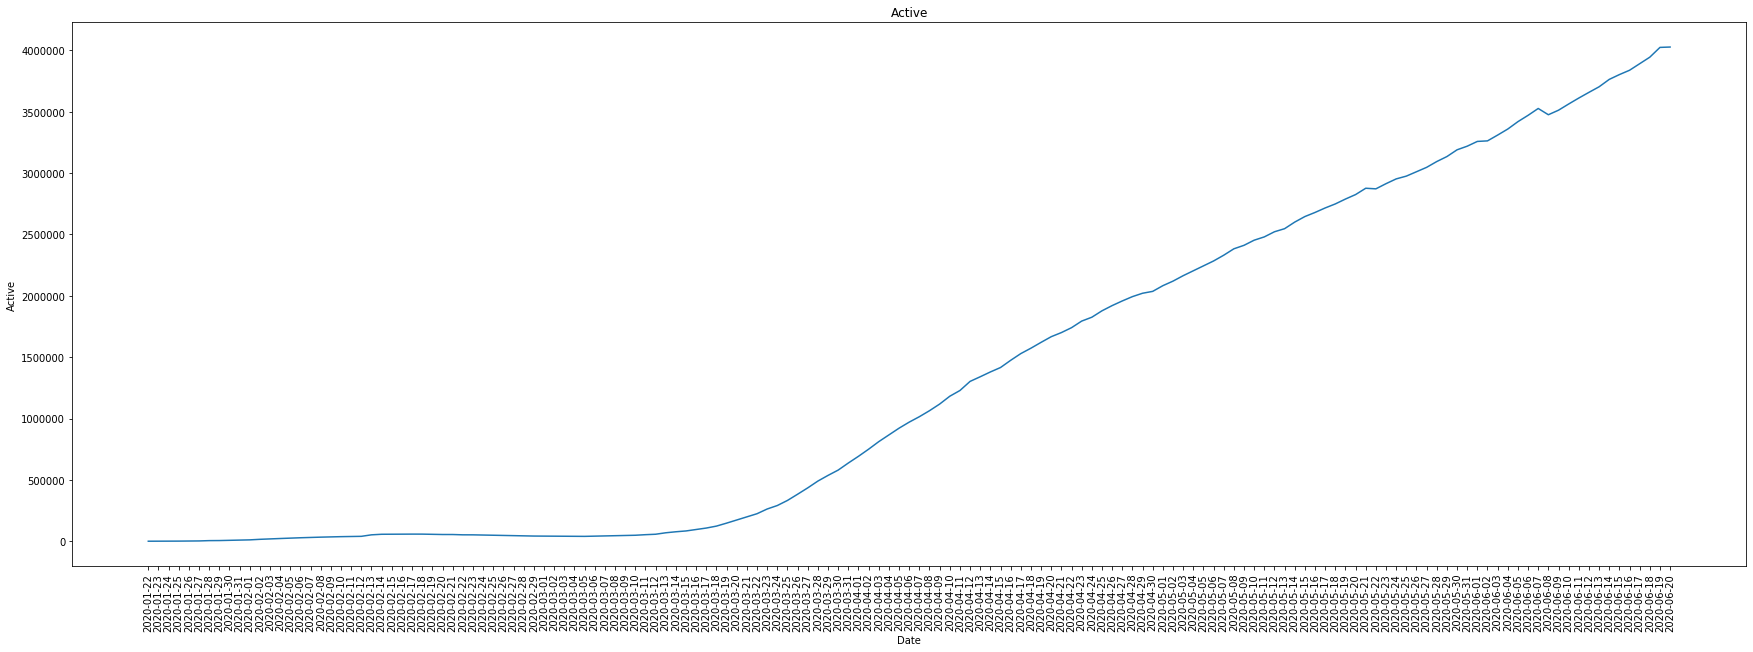

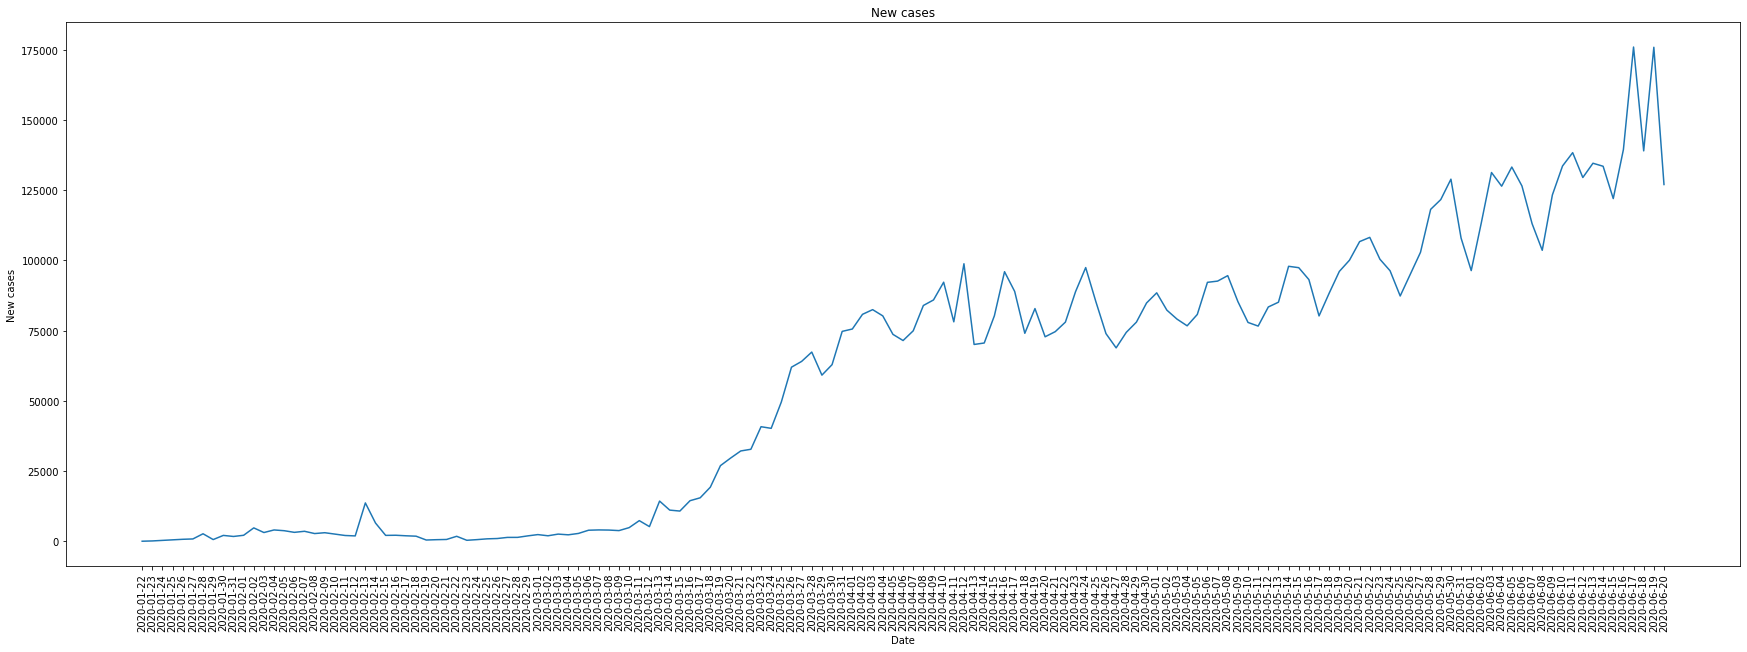

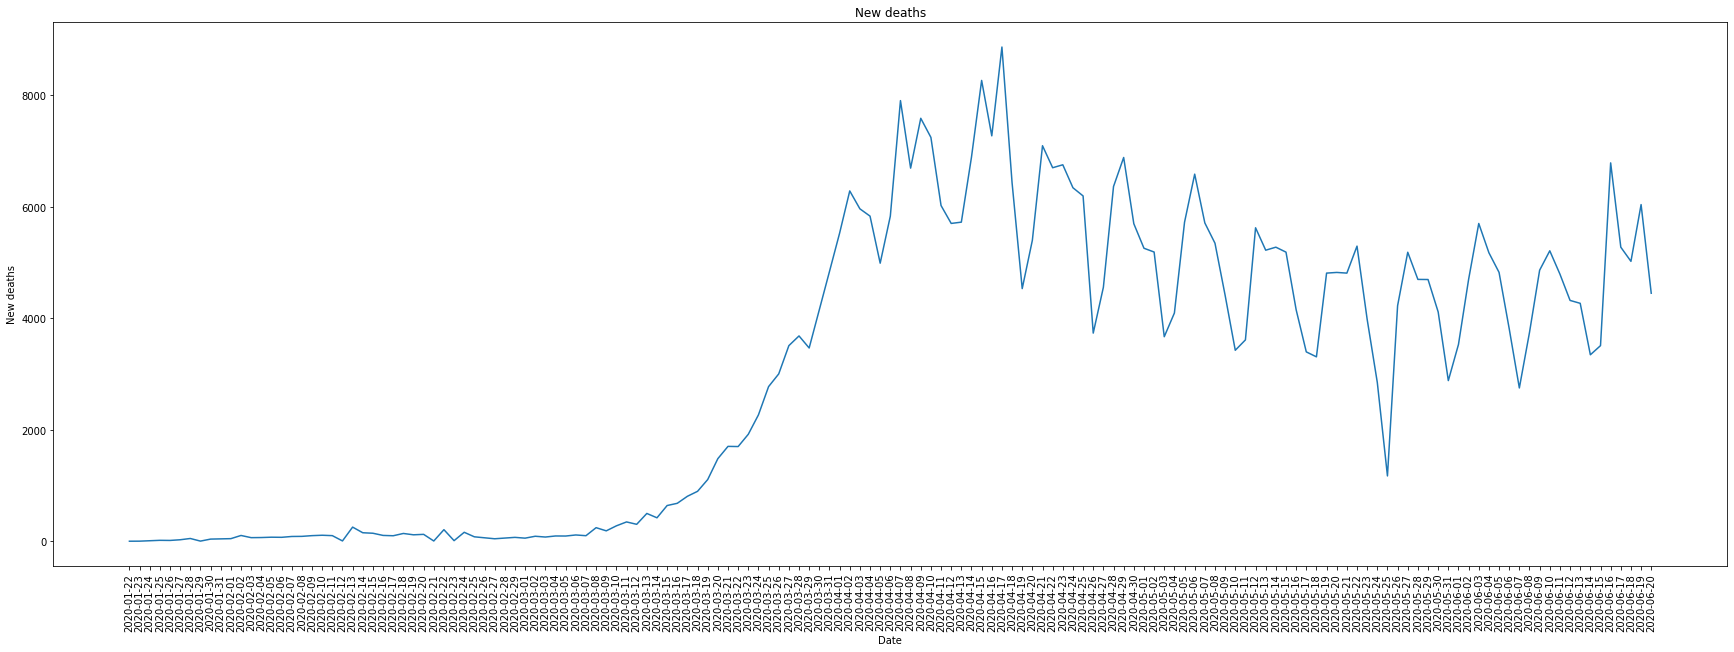

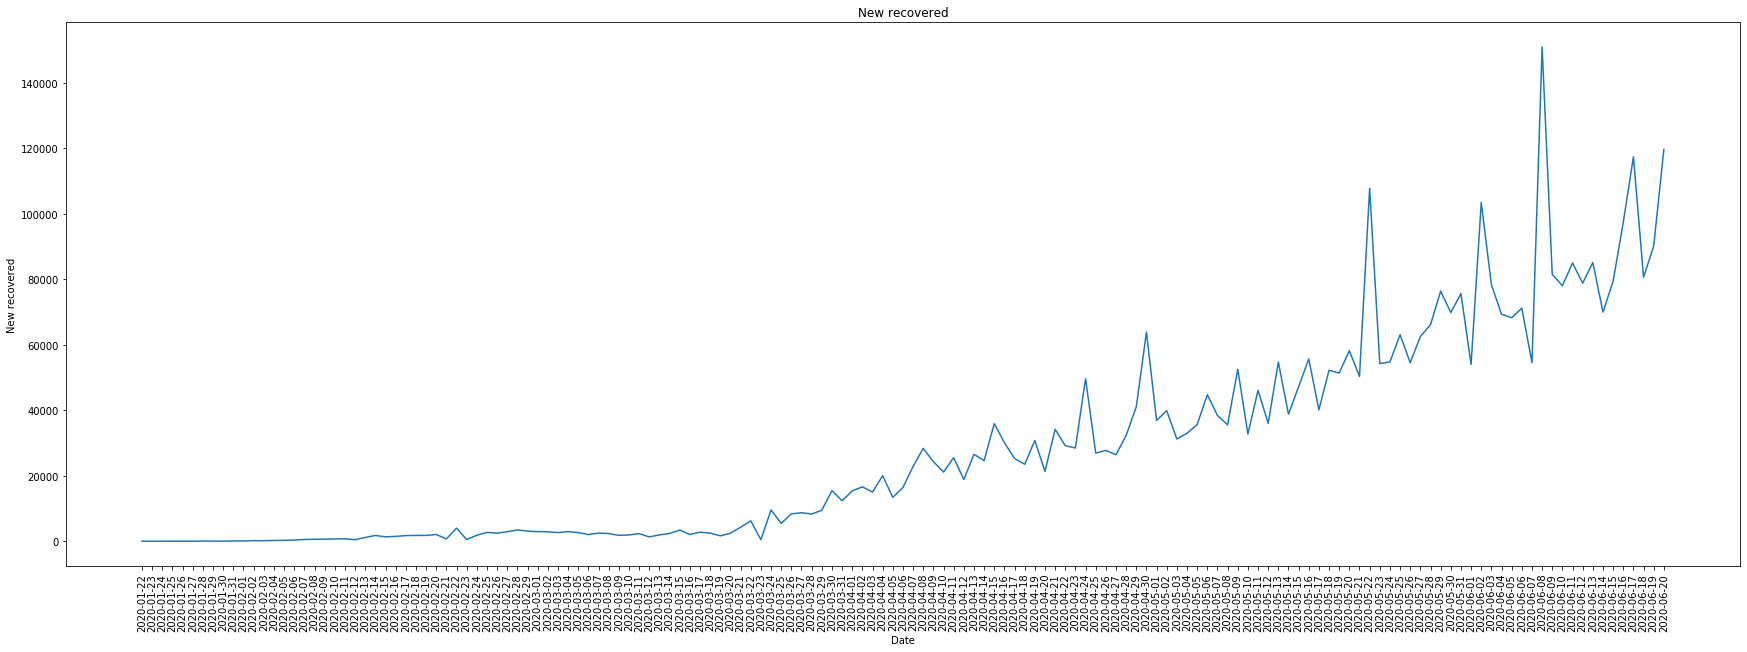

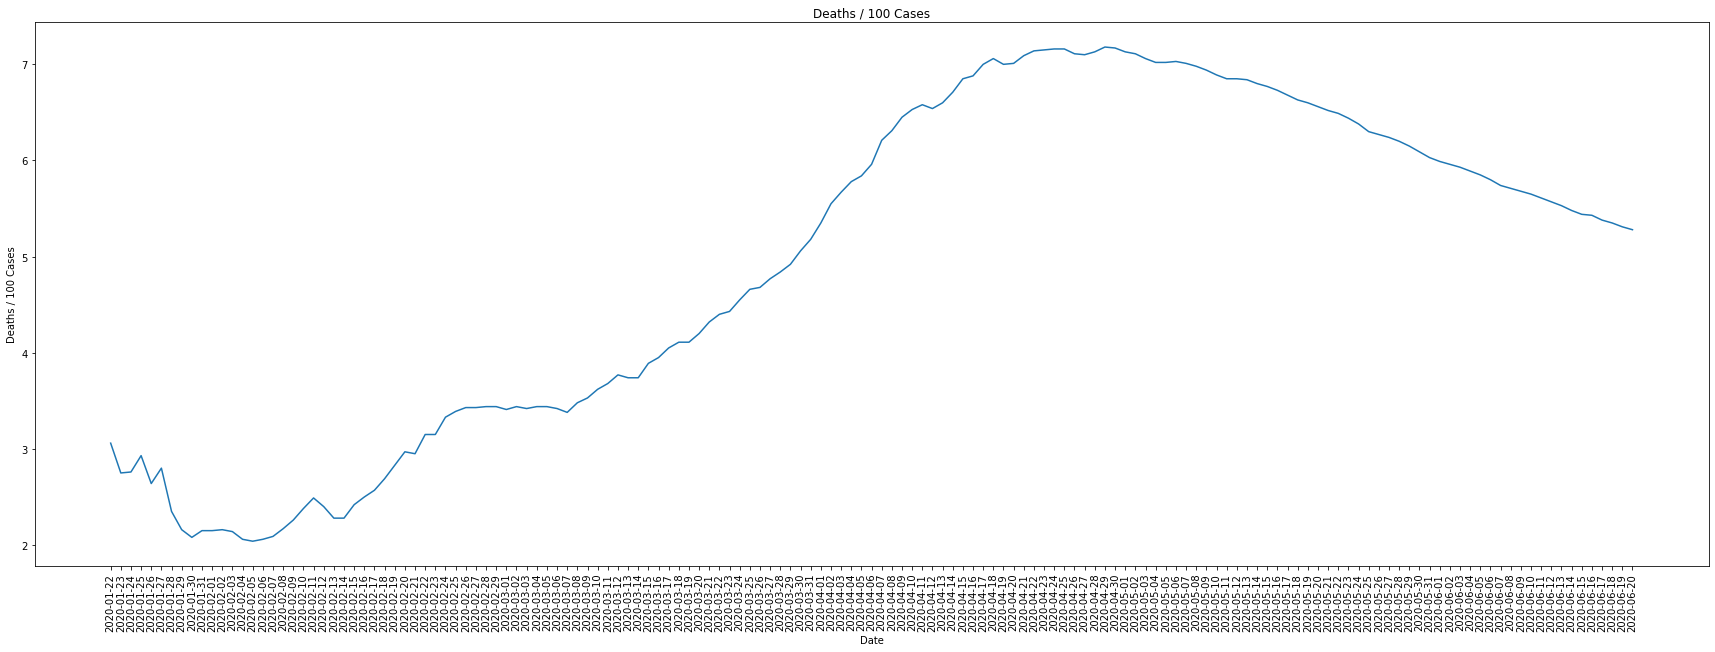

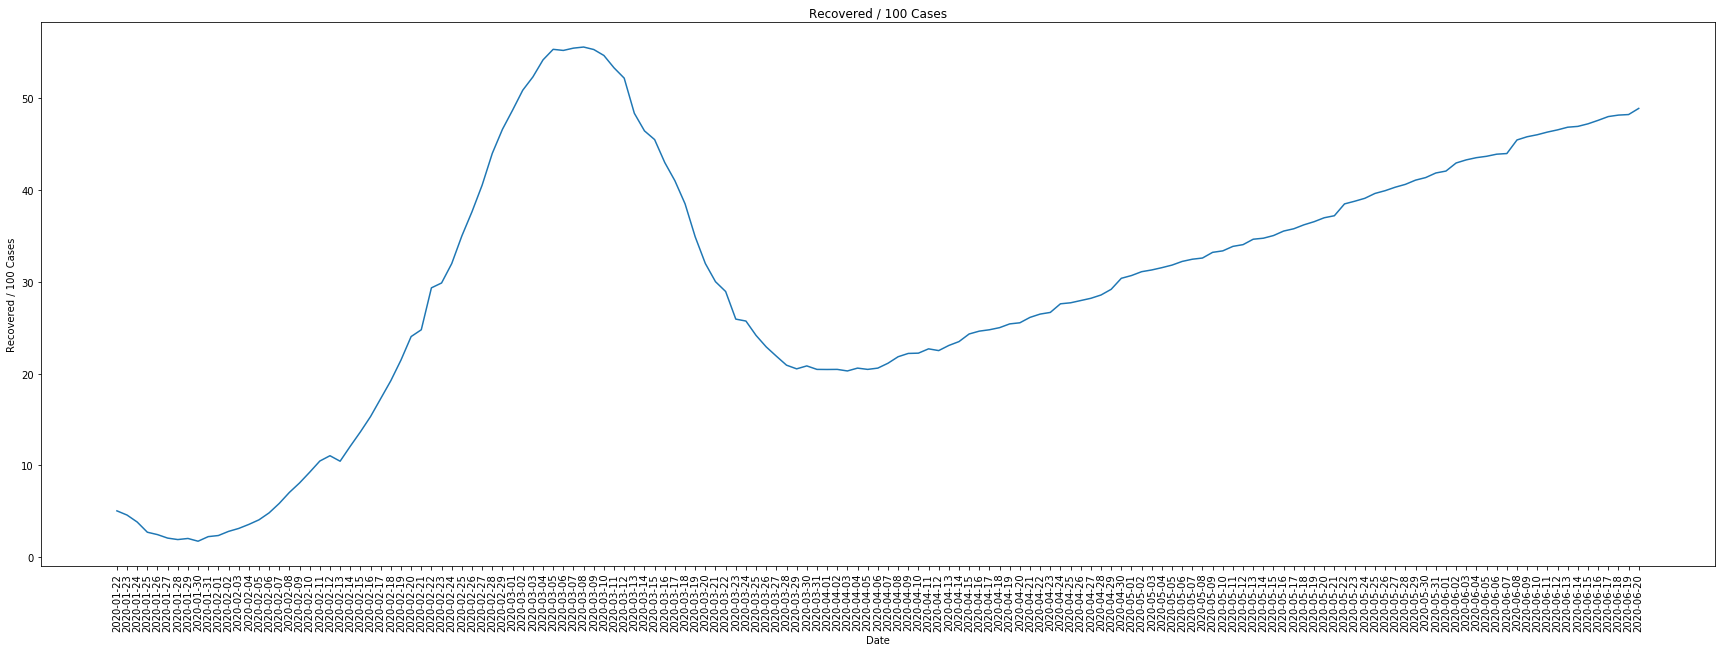

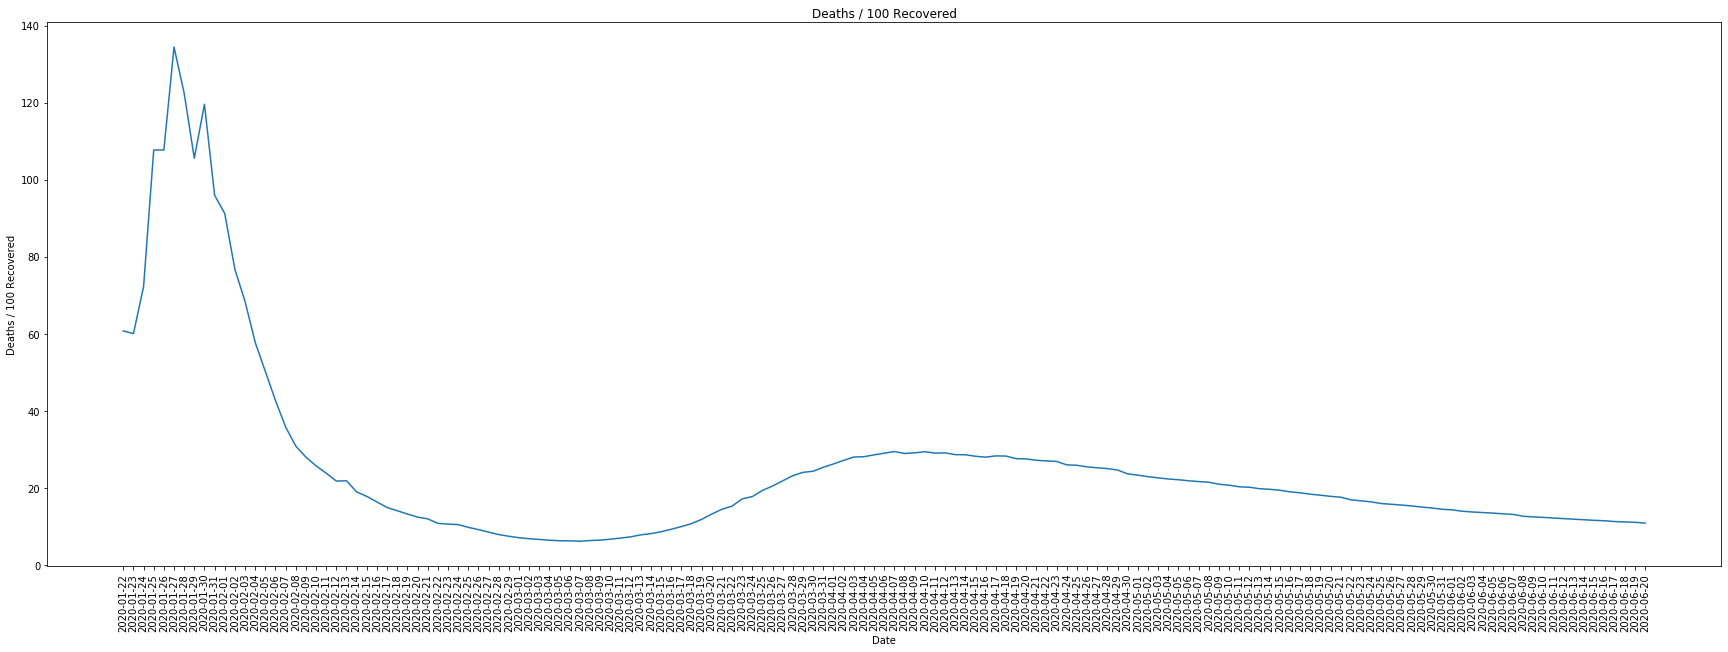

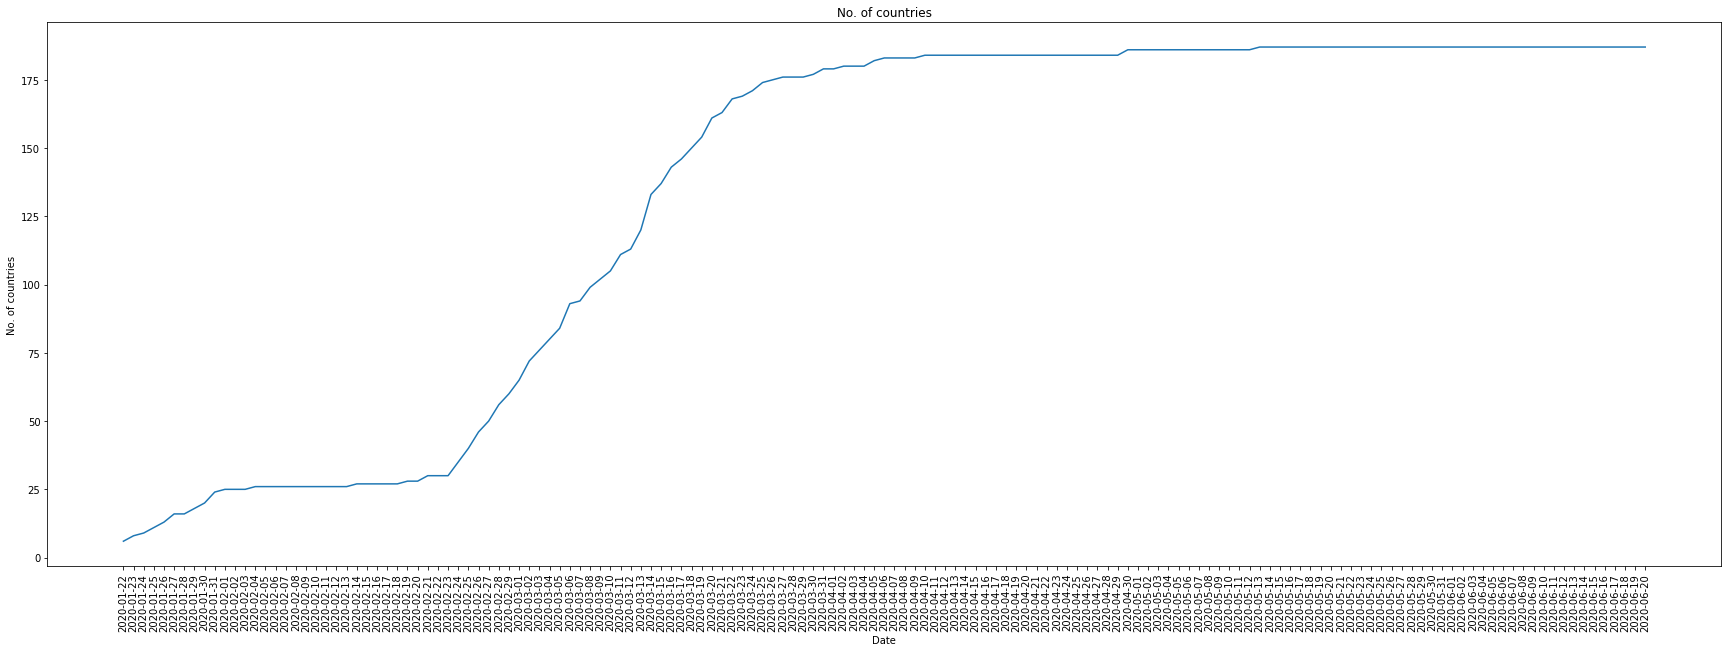

In [35]:
lis = list(df.columns)
for i in range(1,12):
    plt.figure(figsize=(30,10))
    plt.plot(df['Date'],df.iloc[:,i])
    plt.xlabel("Date")
    plt.xticks(rotation = 90)
    plt.ylabel(lis[i])
    plt.title(lis[i])
    plt.show()

In [6]:
#Running Dicky-Fuller Test to check whether a time series is stationary
#Since the p-value is way greater than the threshold value 0.05 and ADF Statistic 
#is nowhere close to the critical value
#Hence we conclude that the time series is not stationary
def get_stationary(dc):
    result = adfuller(dc)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

In [10]:
dc = df['Confirmed']
get_stationary(dc)

ADF Statistic: 1.7821523144176425
p-value: 0.9983129543425444
Critical Values:
	1%: -3.4779446621720114
	5%: -2.8824156122448983
	10%: -2.577901887755102


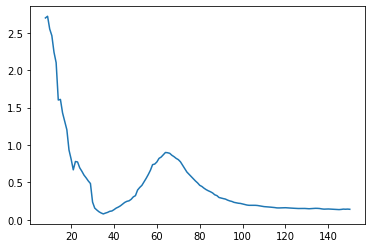

In [28]:
#To make time series stationary we will apply first log transform 
#Then we will use differencing with the appropriate shift
df['Confirmed_log'] = np.log(df['Confirmed'])
df['Confirmed_log_diff'] = df['Confirmed_log'] - df['Confirmed_log'].shift(8)
df['Confirmed_log_diff'].dropna().plot()

In [29]:
#Since p- value is less than the signifance level 0.05 and ADF Statistic is closer to the 
#critical values. We obtained the required stationary series
get_stationary(df['Confirmed_log_diff'].dropna())

ADF Statistic: -2.895306272718409
p-value: 0.045896542974103956
Critical Values:
	1%: -3.4825006939887997
	5%: -2.884397984161377
	10%: -2.578960197753906


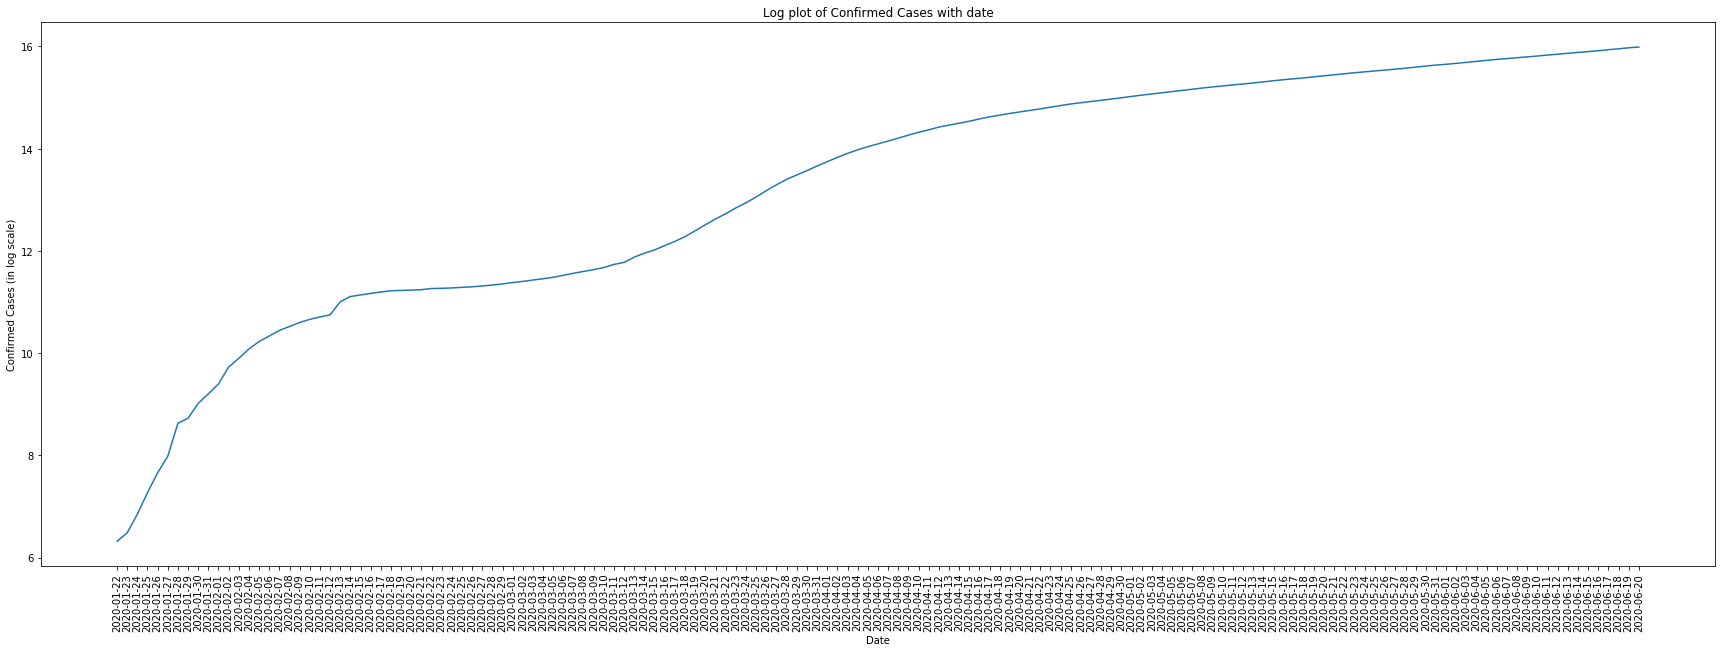

In [36]:
plt.figure(figsize=(30,10))
plt.plot(df['Date'],df['Confirmed_log'])
plt.xlabel('Date')
plt.ylabel('Confirmed Cases (in log scale)')
plt.xticks(rotation = 90)
plt.title('Log plot of Confirmed Cases with date')
plt.show()

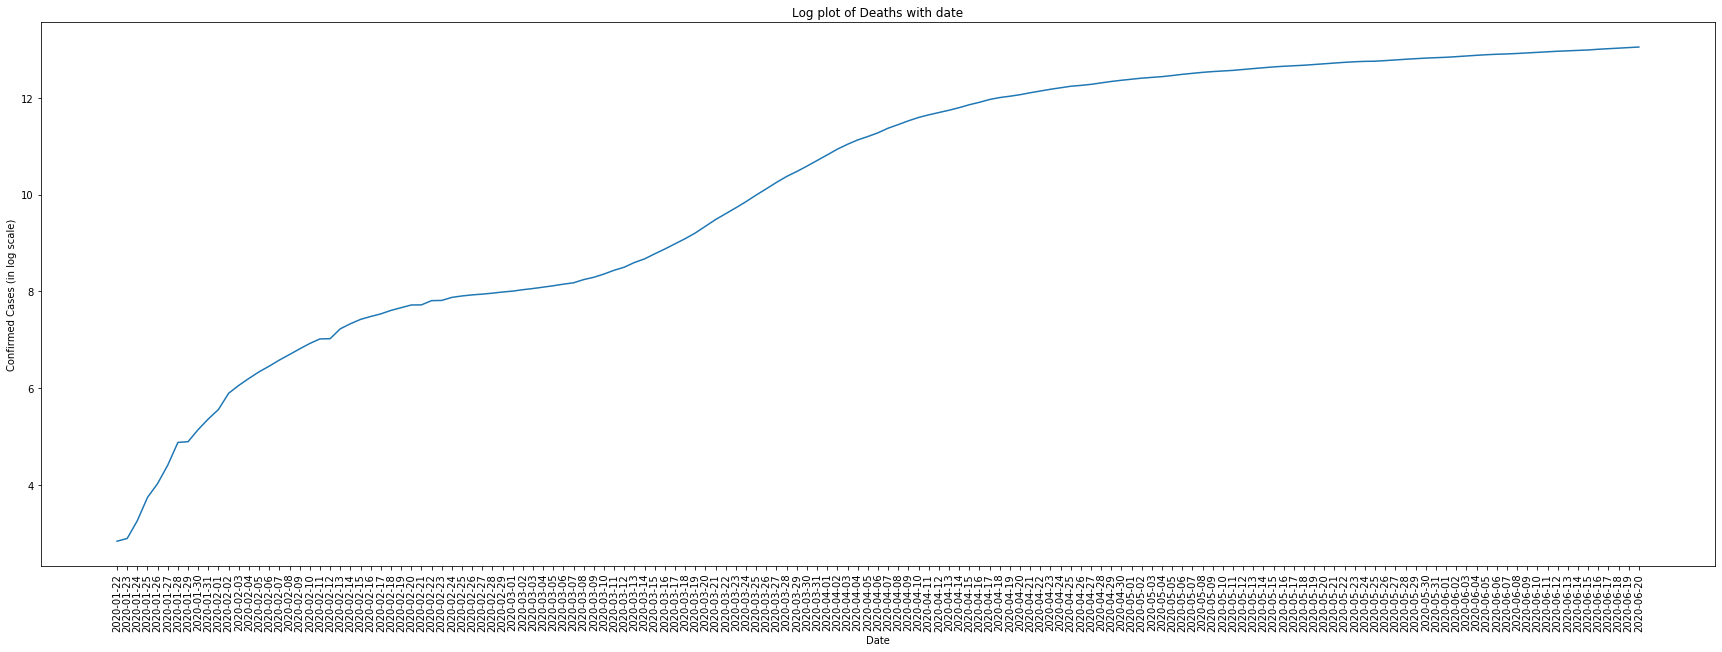

In [37]:
plt.figure(figsize=(30,10))
plt.plot(df['Date'],np.log(df['Deaths']))
plt.xlabel('Date')
plt.ylabel('Confirmed Cases (in log scale)')
plt.xticks(rotation = 90)
plt.title('Log plot of Deaths with date')
plt.show()

In [41]:
#Calculating correlation coefficents of Confirmed Cases with Deaths,Recovered,Active,Dates
from scipy.stats import pearsonr
corr,_ = pearsonr(df['Confirmed'],df['Deaths'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.991


In [42]:
corr,_ = pearsonr(df['Confirmed'],df['Recovered'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.984


In [43]:
corr,_ = pearsonr(df['Confirmed'],df['Active'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.989
